1. Linear Regression ASSUMPTIONS
    a.Linear relationship - the relationship between the independent and dependent variables to be linear
    b. Multivariate normality - all variables to be multivariate normal
    c. No or little multicollinearity - the independent variables are too highly correlated with each other
    d. No auto-correlation - Autocorrelation occurs when the residuals are not independent from each other
    e. Homoscedasticity - meaning the residuals are equal across the regression line 

In [7]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as  plt

# %matplotlib is a magic function in IPython
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend: 
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
#directly below the code cell that produced it

%matplotlib inline 

C:\Users\VIBIN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\VIBIN\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\VIBIN\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [5]:
df = pd.read_csv("C:/Users/VIBIN/Desktop/practice/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
#Separating output y and input parameters in x
y = df.charges
x = df.iloc[:,:-1]
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [12]:
#Convert categorical variable into dummy/indicator variables
x = pd.get_dummies(x,drop_first = True)
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [13]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y, test_size=0.3, random_state = 1)

In [14]:
est = linear_model.LinearRegression()
est.fit(x_train,y_train)

y_test_pred = est.predict(x_test)

In [15]:
result = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})

In [18]:
result.head()

,actual,predicted
559,1646.4297,4610.315541
1087,11353.2276,12887.893880
1020,8798.5930,12573.948752
460,10381.4787,13197.836626
802,2103.0800,629.337182


In [19]:
result["residual"] = result.actual - result.predicted

In [20]:
result.head()

,actual,predicted,residual
559,1646.4297,4610.315541,-2963.885841
1087,11353.2276,12887.893880,-1534.666280
1020,8798.5930,12573.948752,-3775.355752
460,10381.4787,13197.836626,-2816.357926
802,2103.0800,629.337182,1473.742818


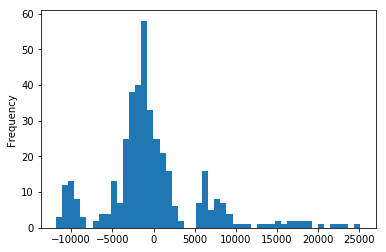

In [21]:
result.residual.plot.hist(bins = 50)

In [22]:
SSE = np.sum(result.residual ** 2)

In [32]:
MSE = SSE/result.shape[0]
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

RMSE : 6063.122656850449


In [33]:
np.std(y_test)

11904.481211649017

In [34]:
SST = np.sum((np.mean(y_train)-y_test)**2)
print('SST :',SST)

SST : 56970277938.44924


In [35]:
R2 = 1 - (SSE/SST)
print('R2 SCORE :',R2)

R2 SCORE : 0.7405997304511027


In [36]:
metrics.mean_squared_error(y_test,y_test_pred)

36761456.352013245

In [37]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927213

In [41]:
est.intercept_,est.coef_

(-11039.238418561543,
 array([  251.68186515,   322.38910684,   344.9642553 ,  -282.79634661,
        24059.39047692,  -304.09009765,  -939.34209691,  -868.18855866]))

In [43]:
x.shape[0]

1338

In [58]:
n = x.shape[0] # NO OF OBSERVATION
p = x.shape[1] # NO OF INDEPENDENT FEATURES
R2_ADJUSTED = 1 - ((n-1)*(1-R2**2)/(n-p-1))
print('R2_ADJUSTED :',R2_ADJUSTED)

R2_ADJUSTED : 0.5457700553160699


In [60]:
pd.DataFrame({"feature": x.columns, "coef": est.coef_})

,coef,feature
0,251.681865,age
1,322.389107,bmi
2,344.964255,children
3,-282.796347,sex_male
4,24059.390477,smoker_yes
5,-304.090098,region_northwest
6,-939.342097,region_southeast
7,-868.188559,region_southwest


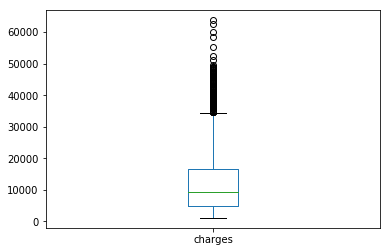

In [62]:
(df.charges).plot.box()

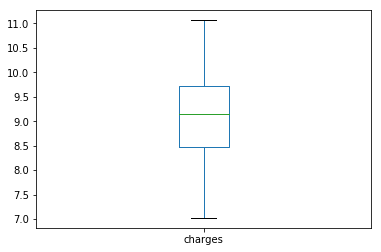

In [63]:
np.log(df.charges).plot.box()

In [67]:
#Standardize features by removing the mean and scaling to unit variance
scaler = preprocessing.StandardScaler()
scaler.fit(X)
pd.DataFrame(scaler.transform(X), columns=X.columns).head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [66]:
#Template for Linear Regression
target = "charges" # output column
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scalar", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred  = pipe.predict(X_test) 

print("Training MSE", metrics.mean_squared_error(y_train, y_train_pred),
     "\nTesting  MSE", metrics.mean_squared_error(y_test, y_test_pred),
     "\nTraining R2 ", metrics.r2_score(y_train, y_train_pred),
     "\nTesting  R2 ", metrics.r2_score(y_test, y_test_pred)) 

Training MSE 0.2040716498781539 
Testing  MSE 0.17881132833282087 
Training R2  0.7589104330619342 
Testing  R2  0.78742951961976


In [4]:
data = [0,1,2,3,4]
price = [1,3,7,13,21]

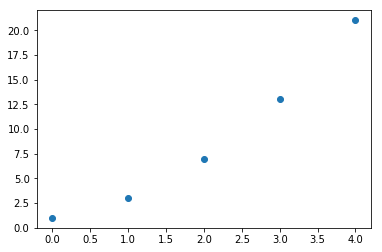

In [11]:
plt.scatter(data,price)